In [136]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

#Import the module for the linear regression model
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

pd.set_option('display.max_columns', None)
plt.style.use('bmh')
sns.set()

In [137]:
#Import the data
data = '/content/drive/MyDrive/Pacmann/ford_car_price.csv'
df = pd.read_csv(data)
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [138]:
#Check the data first
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


Define The Problems:
Variabel manakah pada data yang mempunyai pengaruh terhadap probabilitas dari price?
Apakah variabel mileage, tax, mpg dan engineSize mempunyai hubungan yang kuat dengan probabilitas dari price?
Bagaimana kesimpulan akhirnya ? dan rekomendasi apakah yang dapat dilakukan?

In [139]:
# Pertama, mengecek proporsi jumlah missing values yang terdapat pada setiap features.
# Kedua, mengecek jumlah data yang terduplikasi.

print("Missing values proportion:")
print(df.isnull().sum()/df.shape[0]) # Untuk menghitung proporsi dari missing values pada setiap features/kolom.
print("="*50)
print("Duplicate data:")
print(df.duplicated().sum()) # Untuk menghitung jumlah data yang terduplikasi.

Missing values proportion:
model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64
Duplicate data:
154


In [140]:
# Pertama, menghilangkan data yang terduplikasi.
# Kedua, mengecek persentasi data yang hilang apabila dilakukan penghilangan missing values. Jika persentasi data yang hilang kurang dari 20 %, maka dapat dilanjutkan dengan tahapan berikutnya.

df.drop_duplicates(inplace = True) # Untuk menghilangkan data yang terduplikasi.
df_new = df.dropna() # Untuk menghilangkan missing values pada data.
loss = 100 - (df_new.shape[0]/df.shape[0])*100 # Untuk menghitung persentase jumlah data yang hilang setelah dilakukan penghapusan data terduplikasi dan missing values.

print("Duplicated data:")
print(df.duplicated().sum())
print("="*50)
print("Data info:")
print(df_new.info())
print("="*50)
print("Percentage data loss:")
print(f"{np.round(loss,3)} %")

Duplicated data:
0
Data info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17812 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17812 non-null  object 
 1   year          17812 non-null  int64  
 2   price         17812 non-null  int64  
 3   transmission  17812 non-null  object 
 4   mileage       17812 non-null  int64  
 5   fuelType      17812 non-null  object 
 6   tax           17812 non-null  int64  
 7   mpg           17812 non-null  float64
 8   engineSize    17812 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.4+ MB
None
Percentage data loss:
0.0 %


In [141]:
# Mengubah tipe data.
dict_ = {"year" : "category"}
df = df.astype(dict_) # mengubah tipe data dengan ketentuan pada dictionary yang telah dibuat.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17812 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   model         17812 non-null  object  
 1   year          17812 non-null  category
 2   price         17812 non-null  int64   
 3   transmission  17812 non-null  object  
 4   mileage       17812 non-null  int64   
 5   fuelType      17812 non-null  object  
 6   tax           17812 non-null  int64   
 7   mpg           17812 non-null  float64 
 8   engineSize    17812 non-null  float64 
dtypes: category(1), float64(2), int64(3), object(3)
memory usage: 1.2+ MB
None


# **Exploratory Data Analysis**


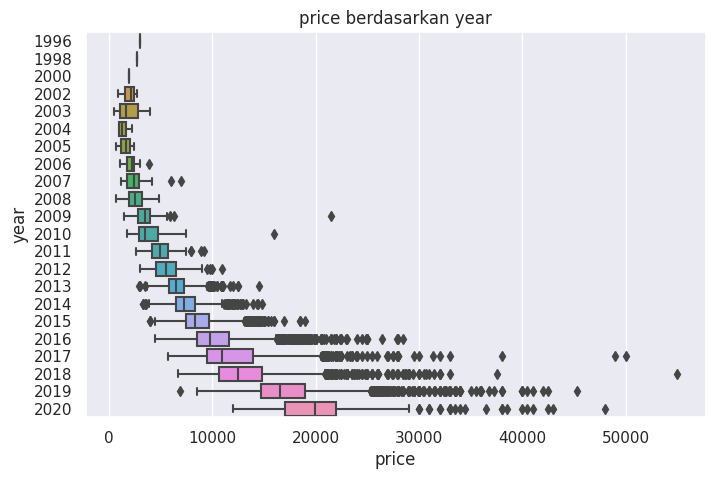

In [142]:
# Kode di bawah bertujuan untuk melihat distribusi dari price berdasarkan kategori year dengan menggunakan boxplot.
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = "price", y = "year", data = df, ax = ax)
ax.set_title("price berdasarkan year")
plt.show()

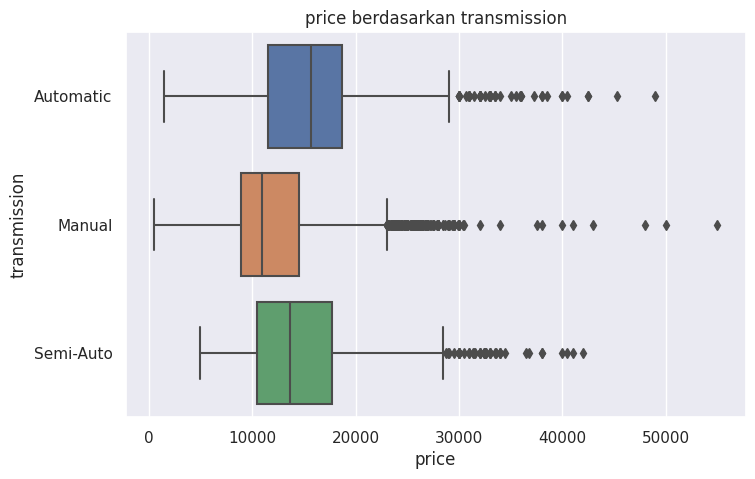

In [143]:
# Kode di bawah bertujuan untuk melihat distribusi dari price berdasarkan kategori transmission dengan menggunakan boxplot.
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = "price", y = "transmission", data = df, ax = ax)
ax.set_title("price berdasarkan transmission")
plt.show()

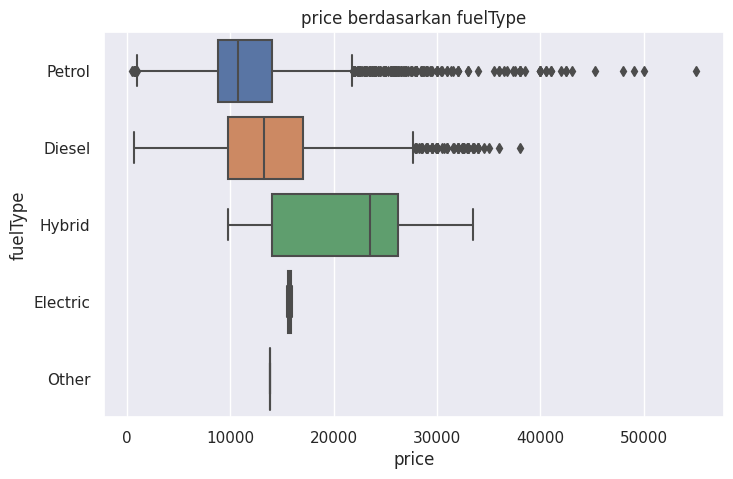

In [144]:
# Kode di bawah bertujuan untuk melihat distribusi dari price berdasarkan kategori fuelType dengan menggunakan boxplot.
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = "price", y = "fuelType", data = df, ax = ax)
ax.set_title("price berdasarkan fuelType")
plt.show()

## **Statistical Test**



In [145]:
# Import module
from scipy.stats import ttest_ind,levene,kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.diagnostic import normal_ad

In [146]:
# Kode di bawah ini bertujuan untuk melakukan uji ANOVA pada pengaruh efek jenis year
print("Pertama, menyatakan hipotesis dan taraf signifikansi :")
print("H0 : tidak ada perbedaan price terhadap semua year")
print("H1 : setidaknya ada satu year dimana price berbeda dibandingkan dengan lainnya")
print("Alpha = 0.05")

model_year = ols('price ~ year', data = df).fit() # Membuat persamaan linear antara price dengan variabel year.
aov_table_1 = sm.stats.anova_lm(model_year) # Melakuakn uji ANOVA.

print("="*50)

print("Hasil dari Uji ANOVA :")
print(aov_table_1)
print("="*50)

print("Kesimpulan :")
print("Karena hasil uji ANOVA menyatakan p-value > 0.05, maka keputusan yang diperoleh adalah gagal untuk menolak H0 yang dimana tidak ada perbedaan price terhadap semua year" )

Pertama, menyatakan hipotesis dan taraf signifikansi :
H0 : tidak ada perbedaan price terhadap semua year
H1 : setidaknya ada satu year dimana price berbeda dibandingkan dengan lainnya
Alpha = 0.05
Hasil dari Uji ANOVA :
               df        sum_sq       mean_sq           F  PR(>F)
year         21.0  1.907638e+11  9.083990e+09  774.041667     0.0
Residual  17790.0  2.087797e+11  1.173579e+07         NaN     NaN
Kesimpulan :
Karena hasil uji ANOVA menyatakan p-value > 0.05, maka keputusan yang diperoleh adalah gagal untuk menolak H0 yang dimana tidak ada perbedaan price terhadap semua year


In [147]:
# Kode di bawah ini bertujuan untuk melakukan uji ANOVA pada pengaruh efek jenis transmision
print("Pertama, menyatakan hipotesis dan taraf signifikansi :")
print("H0 : mu_Automatic = mu_Manual = mu_Semiauto")
print("H1 : setidaknya ada satu transmission yang dimana berbeda dari yang lainnya")
print("Alpha = 0.05")

model_transmission = ols('price ~ transmission', data = df).fit() # Membuat persamaan linear antara price dengan variabel transmission.
aov_table_1 = sm.stats.anova_lm(model_transmission) # Melakuakn uji ANOVA.

print("="*50)

print("Hasil dari Uji ANOVA :")
print(aov_table_1)
print("="*50)

print("Kesimpulan :")
print("Karena hasil uji ANOVA menyatakan p-value < 0.05, maka keputusan yang diperoleh adalah menolak hipotesis H0 dan menerima hipotesis H1 yang berarti adanya pengaruh dari salah satu transmission terhadap price" )

Pertama, menyatakan hipotesis dan taraf signifikansi :
H0 : mu_Automatic = mu_Manual = mu_Semiauto
H1 : setidaknya ada satu transmission yang dimana berbeda dari yang lainnya
Alpha = 0.05
Hasil dari Uji ANOVA :
                   df        sum_sq       mean_sq           F         PR(>F)
transmission      2.0  2.702540e+10  1.351270e+10  646.002771  1.427330e-271
Residual      17809.0  3.725181e+11  2.091740e+07         NaN            NaN
Kesimpulan :
Karena hasil uji ANOVA menyatakan p-value < 0.05, maka keputusan yang diperoleh adalah menolak hipotesis H0 dan menerima hipotesis H1 yang berarti adanya pengaruh dari salah satu transmission terhadap price


In [148]:
# Kode di bawah ini bertujuan untuk melakukan uji ANOVA pada pengaruh efek jenis fuelType
print("Pertama, menyatakan hipotesis dan taraf signifikansi :")
print("H0 : mu_Petrol = mu_Diesel = mu_Hybrid = mu_Electric = mu_Others")
print("H1 : Adanya pengaruh fuelType terhadap price")
print("Alpha = 0.05")

model_fuelType = ols('price ~ fuelType', data = df).fit() # Membuat persamaan linear antara price dengan variabel sfuelType.
aov_table_1 = sm.stats.anova_lm(model_fuelType) # Melakuakn uji ANOVA.

print("="*50)

print("Hasil dari Uji ANOVA :")
print(aov_table_1)
print("="*50)

print("Kesimpulan :")
print("Karena hasil uji ANOVA menyatakan p-value < 0.05, maka keputusan yang diperoleh adalah menolak hipotesis H0 dan menerima hipotesis H1 yang berarti adanya pengaruh dari salah satu fuelType terhadap price" )

Pertama, menyatakan hipotesis dan taraf signifikansi :
H0 : mu_Petrol = mu_Diesel = mu_Hybrid = mu_Electric = mu_Others
H1 : Adanya pengaruh fuelType terhadap price
Alpha = 0.05
Hasil dari Uji ANOVA :
               df        sum_sq       mean_sq           F         PR(>F)
fuelType      4.0  1.830884e+10  4.577209e+09  213.795809  1.707552e-179
Residual  17807.0  3.812346e+11  2.140926e+07         NaN            NaN
Kesimpulan :
Karena hasil uji ANOVA menyatakan p-value < 0.05, maka keputusan yang diperoleh adalah menolak hipotesis H0 dan menerima hipotesis H1 yang berarti adanya pengaruh dari salah satu fuelType terhadap price


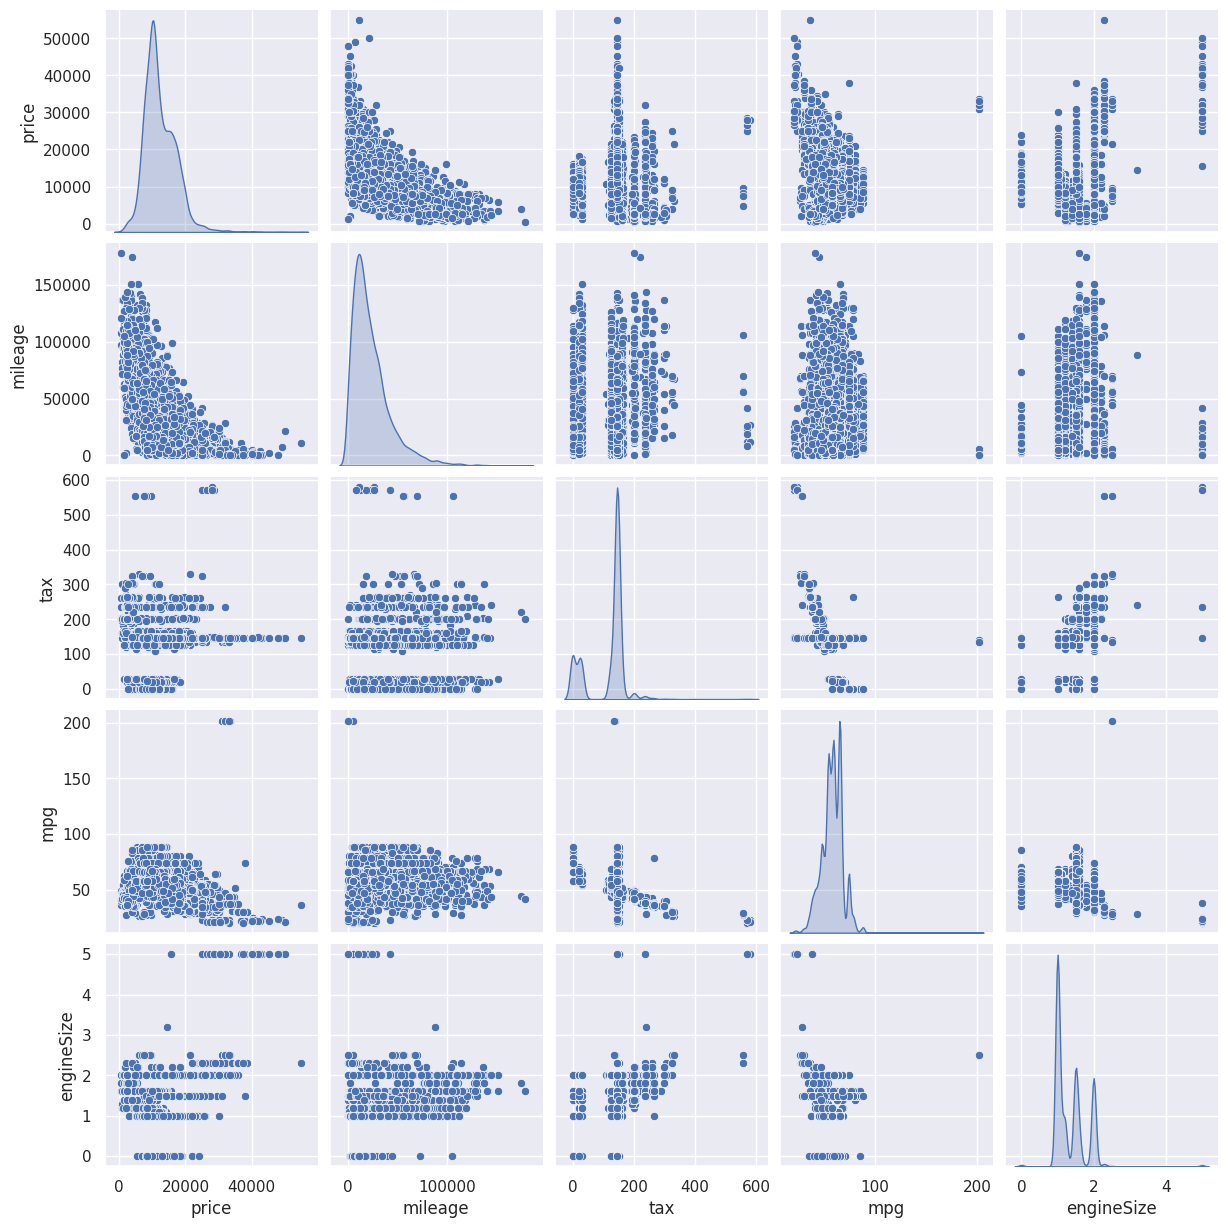

In [149]:
# Kode di bawah bertujuan untuk memvisualisasikan interaksi antara beberapa features dengan meggunakan scatter plot dan kde plot.
columns_ = ["price","mileage","tax","mpg","engineSize"]
sns.pairplot(df[columns_], diag_kind = 'kde')
plt.show()

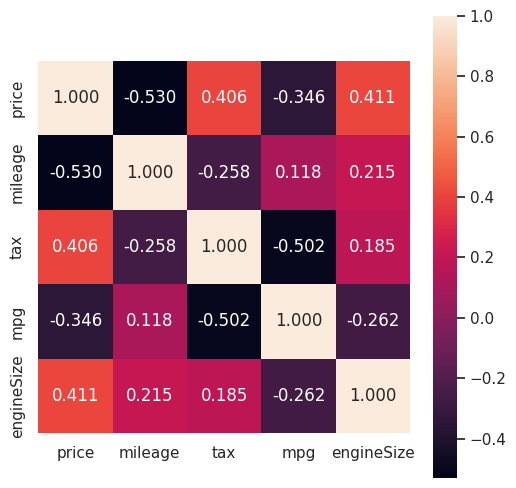

In [150]:
# Kode di bawah untuk melihat korelasi antar features.
corr_ = df[columns_].corr()
plt.figure(figsize = (6,6))
sns.heatmap(corr_, fmt= ".3f", annot= True,square= True)
plt.show()

Berdasarkan kedua plot di atas, terlihat bahwa variabel mileage dan mpg tidak memiliki asosiasi yang kuat dengan probabilitas terhadap price.

## **Building Regression Model**
Berdasarkan hasil pengujian statistik sebelumnya, kita mengetahui bahwa terdapat beberapa variabel yang signifikan memengaruhi probabilitas . Variabel-variabel inilah yang akan kita utamakan dalam membangun model regresi. Untuk variabel-variabel yang tidak signifikan tidak akan dilibatkan.

Dengan demikian, dengan melakukan pengujian statistik sebelumnya, secara tidak langsung kita telah melakukan **variable selection**.

In [151]:
# Exclude variabel-variabel yang tidak memberikan efek signifikan terhadap price
df.drop(["model", "mileage", "mpg"], axis=1, inplace = True)
df

,year,price,transmission,fuelType,tax,engineSize
0,2017,12000,Automatic,Petrol,150,1.0
1,2018,14000,Manual,Petrol,150,1.0
2,2017,13000,Manual,Petrol,150,1.0
3,2019,17500,Manual,Petrol,145,1.5
4,2019,16500,Automatic,Petrol,145,1.0
...,...,...,...,...,...,...
17961,2017,8999,Manual,Petrol,150,1.4
17962,2014,7499,Manual,Petrol,30,1.0
17963,2015,9999,Manual,Diesel,20,1.6
17964,2018,8299,Manual,Petrol,145,1.2


In [152]:
#Construct the model
#Jika hasil f-statistik > p-value(0.05) maka model regresi sudah bisa diterima
lm = smf.ols("price ~ year + transmission + fuelType + tax + engineSize" , data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1793.
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:13:16   Log-Likelihood:            -1.6384e+05
No. Observations:               17812   AIC:                         3.277e+05
Df Residuals:                   17782   BIC:                         3.280e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             